# Problem Definition


Develop a machine learning program to identify when a news source may be producing fake news. 


# Importing Libraries and Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
import re
from wordcloud import WordCloud

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Embedding , LSTM , Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report , accuracy_score

                                  Reading .Csv file

In [3]:
fake =  pd.read_csv(r"S:\cap 22\Neural Net for fake news\LSTM Fake news\Fake.csv")

Total No of Rows 23481 and 4 Columns .


In [4]:
fake.shape 

(23481, 4)

                                Top 5 Records of file

In [5]:
fake.head(10) 

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


                                  Columns of Dataset

In [6]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [7]:
fake.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

# EDA  [Exploratory Data Analysis]

<AxesSubplot:xlabel='subject', ylabel='count'>

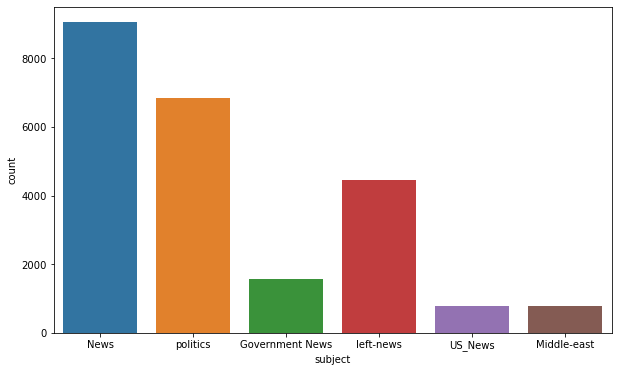

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'subject', data = fake)

# Wordcloud

                                      Exploring Fake News

In [9]:
text = '' .join(fake['text'].tolist())

<function matplotlib.pyplot.show(close=None, block=None)>

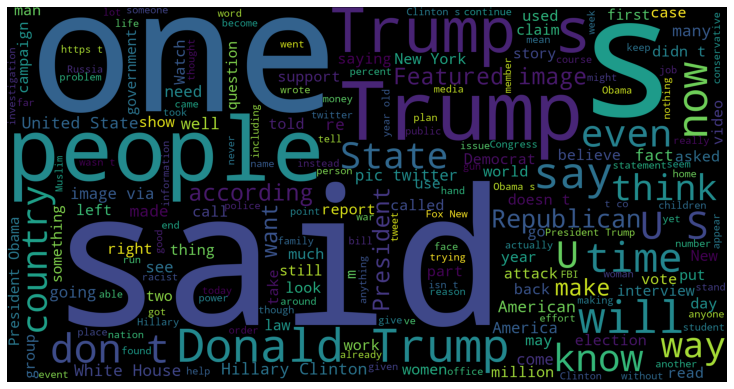

In [10]:
wordcloud = WordCloud(width=1920 , height= 1000).generate(text)
fig = plt.figure(figsize=(10 ,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

                                    Exploring Real News

In [11]:
real=  pd.read_csv(r"S:\cap 22\Neural Net for fake news\LSTM Fake news\True.csv")

In [12]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [13]:
text = '' .join(real['text'].tolist())

<function matplotlib.pyplot.show(close=None, block=None)>

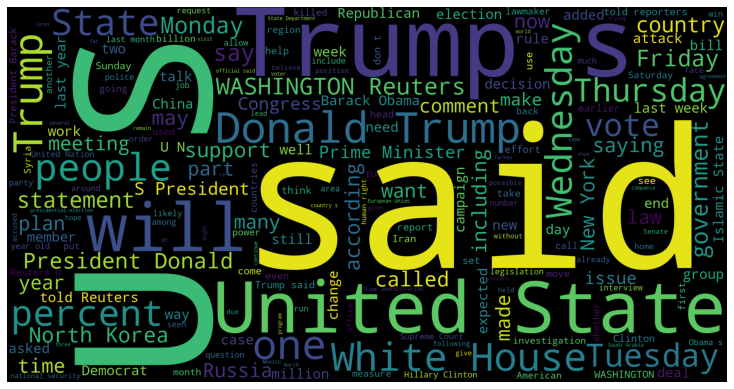

In [14]:
wordcloud = WordCloud(width=1920 , height= 1000).generate(text)
fig = plt.figure(figsize=(10 ,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

                           Creating Function To find unknown_publishers

In [15]:
unknown_publishers = []
for index,row in enumerate(real.text.values):
    try:
        record = row.split('-', maxsplit=1)
        record[1]
        
        assert(len(record[0])<120)
    except:
        unknown_publishers.append(index)

                                Total no of unknown_publishers

In [16]:
len(unknown_publishers)

222

                             checking Null value

In [17]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [18]:
real.isnull().sum().sort_values(ascending = False)   

title      0
text       0
subject    0
date       0
dtype: int64

In [19]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [20]:
real = real.drop(8970, axis=0)

In [21]:
publisher = []         # known_publishers
tmp_text = []         # unknown_publishers

for index, row in enumerate(real.text.values):
    if index in unknown_publishers:
        tmp_text.append(row)
        publisher.append('unknown')
        
    else:
        record = row.split('-' , maxsplit=1)
        publisher.append(record[0].strip())
        tmp_text.append(record[1].strip())

                                  Creating new column for publisher

In [22]:
real['publisher']=publisher
real['text']= tmp_text

In [23]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [24]:
real.shape

(21416, 5)

                                        Finding the Empty rows text

In [25]:
empty_fake_index = [index for index, text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [26]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


                                   Merging title and text data

In [27]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + " " + fake['text']

                                   Making Data to lowercase

In [28]:
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

# Preprocessing Text

                                  Creating column class [1] - Real , [0] - Fake

In [29]:
real['class'] = 1
fake['class'] = 0

In [30]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [31]:
real = real[['text' , 'class']]

In [32]:
fake = fake[['text' , 'class']]

In [33]:
data = real.append(fake, ignore_index=True)

In [34]:
data.sample(5)

,text,class
5632,trump faces uphill battle to overcome court's ...,1
43920,boiler room ep #69 – culture club tune in to t...,0
36454,house freedom caucus pressured by very familia...,0
43035,[video] black chamber of commerce president sa...,0
22521,trump fan debates 12-year-old and humiliates ...,0


In [35]:
data.head(10)

,text,class
0,"as u.s. budget fight looms, republicans flip t...",1
1,u.s. military to accept transgender recruits o...,1
2,senior u.s. republican senator: 'let mr. muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge 'much mor...,1
5,"white house, congress prepare for talks on spe...",1
6,"trump says russia probe will be fair, but time...",1
7,factbox: trump on twitter (dec 29) - approval ...,1
8,trump on twitter (dec 28) - global warming the...,1
9,alabama official to certify senator-elect jone...,1


In [36]:
########################################################

                                    Removing stopword special_chars

In [37]:
data.head(10)

,text,class
0,"as u.s. budget fight looms, republicans flip t...",1
1,u.s. military to accept transgender recruits o...,1
2,senior u.s. republican senator: 'let mr. muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge 'much mor...,1
5,"white house, congress prepare for talks on spe...",1
6,"trump says russia probe will be fair, but time...",1
7,factbox: trump on twitter (dec 29) - approval ...,1
8,trump on twitter (dec 28) - global warming the...,1
9,alabama official to certify senator-elect jone...,1


In [38]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kande\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [40]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [41]:
data.text = data.text.apply(lambda x: preprocess(x))

In [42]:
data.head(10)

,text,class
0,u budget fight looms republicans flip fiscal s...,1
1,u military accept transgender recruits monday ...,1
2,senior u republican senator let mr mueller job...,1
3,fbi russia probe helped australian diplomat ti...,1
4,trump wants postal service charge much amazon ...,1
5,white house congress prepare talks spending im...,1
6,trump says russia probe fair timeline unclear ...,1
7,factbox trump twitter dec 29 approval rating a...,1
8,trump twitter dec 28 global warming following ...,1
9,alabama official certify senator elect jones t...,1


In [43]:
y = data['class'].values

                                 Converting text in to list of list

In [44]:
X = [d.split() for d in data['text'].tolist()]

In [45]:
type(X[0])

list

In [46]:
print(X[0])

['u', 'budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'head', 'conservative', 'republican', 'faction', 'u', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'pay', 'tax', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', '2018', 'keeping', 'sharp', 'pivot', 'way', 'among', 'republicans', 'u', 'representative', 'mark', 'meadows', 'speaking', 'cbs', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'even', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'keep', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'big', 'budget', 'increase', 'military', 'spending', 'democrats', 'also', 'want', 'proportional', 'increases', 'non'

                              Word representations in Vector Space 

In [47]:
import gensim  

Word2Vec is an algorithm that converts a word into vectors such that it groups similar words together into vector space 

In [48]:
DIM = 100
w2v_model=gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=10, min_count=1) 

                                Unique word length

In [49]:
len(w2v_model.wv)  

117765

In [50]:
# len(w2v_model.wv.index_to_key) 

In [51]:
w2v_model.wv.most_similar('india')

[('pakistan', 0.7077306509017944),
 ('modi', 0.6754147410392761),
 ('indian', 0.6749233603477478),
 ('malaysia', 0.6724031567573547),
 ('narendra', 0.6511372923851013),
 ('china', 0.6251199841499329),
 ('gwadar', 0.6137365698814392),
 ('philippines', 0.5847564339637756),
 ('waterway', 0.582524299621582),
 ('thailand', 0.5794512033462524)]

In [52]:
w2v_model.wv.most_similar('modi')

[('narendra', 0.8152948617935181),
 ('india', 0.6754146814346313),
 ('gujarat', 0.5932126641273499),
 ('janata', 0.5873529314994812),
 ('bharatiya', 0.585634171962738),
 ('renames', 0.54359370470047),
 ('thailand', 0.5206788778305054),
 ('indian', 0.5203961133956909),
 ('gandhi', 0.5180771350860596),
 ('najib', 0.5115371346473694)]

In [53]:
# w2v_moodel.wv.most_similar['trump']

                              Tokenization 

In [54]:
tokenizer = Tokenizer()

In [55]:
tokenizer.fit_on_texts(X)

In [56]:
X = tokenizer.texts_to_sequences(X)

In [57]:
# tokenizer.word_index        # Particular word sequence no

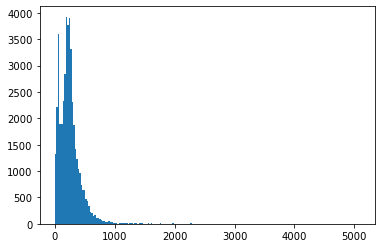

In [58]:
plt.hist([len(x) for x in X], bins = 200 )
plt.show()

In [59]:
nos  = np.array([len(x) for x in X])             # Words more than 1000 count
len(nos[nos>1000])

322

 # Text Padding

Model require to have inputs with the same shape and size. And not all the sentences have the same length. So we need to do padding.
Padding is done by adding zeros for short sentences(pre or post the sentence) and truncating the sentences which exceed the max number of words which is declared by "maxlen".

In [60]:
maxlen = 1000
X = pad_sequences(X , maxlen=maxlen)       # pad_sequences is used to ensure that all sequences in a list have the same length.

In [61]:
len(X[101]) 

1000

In [62]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [63]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size, DIM))
    
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
        
    return weight_matrix

In [64]:
embedding_vectors =  get_weight_matrix(w2v_model)

In [65]:
embedding_vectors.shape

(117766, 100)

                   Arranging the Keras layers in a sequential order 

In [66]:
model = Sequential()
# this layer converts padded data into vectors

model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))

# output layer
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         11776600  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 11,893,977
Trainable params: 117,377
Non-trainable params: 11,776,600
_________________________________________________________________


                            Splitting train_data into train and validation set


In [68]:
X_train , X_test, y_train, y_test = train_test_split(X,y)

                            Model Training

In [69]:
model.fit(X_train,y_train, validation_split=0.3, epochs=3) 

Epoch 1/3
737/737 [==============================] - 860s 1s/step - loss: 0.1187 - acc: 0.9573 - val_loss: 0.0789 - val_acc: 0.9722
Epoch 2/3
737/737 [==============================] - 816s 1s/step - loss: 0.0584 - acc: 0.9797 - val_loss: 0.0495 - val_acc: 0.9785
Epoch 3/3
737/737 [==============================] - 807s 1s/step - loss: 0.0574 - acc: 0.9805 - val_loss: 0.0403 - val_acc: 0.9866


In [70]:
y_pred = (model.predict(X_test) >=0.5).astype(int)

# Result

In [71]:
accuracy_score(y_test , y_pred)

0.9867260579064588

In [72]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5863
           1       0.99      0.99      0.99      5362

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



# Analyse Result

In [73]:
x = ['this is a news']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

In [74]:
(model.predict(x) >= 0.5).astype(int)

array([[0]])

Checking of real and fake news with data and realtime news

for 
Real = 1 &
Fake = 0


In [75]:
x = ['WASHINGTON (Reuters) - U.S. President Donald Trump signed Republicansâ€™ massive $1.5 trillion tax overhaul into law on Friday, cementing the biggest legislative victory of his first year in office, and also approved a short-term spending bill that averts a possible government shutdown. Trump said he wanted to sign the tax bill before leaving Washington on Friday for his Mar-a-Lago estate in Florida, rather than stage a more formal ceremony in January, so he could keep his promise to finish work before Christmas. â€œI didnâ€™t want you folks to say I wasnâ€™t keeping my promise. Iâ€™m keeping my promise,â€ he told reporters in the White House. The two pieces of legislation represent Trumpâ€™s most significant accomplishment with Congress since taking office in January, as well as a sign of what awaits when he returns from Florida after the Christmas holiday. The tax package, the largest such overhaul since the 1980s, slashes the corporate rate from 35 percent to 21 percent and temporarily reduces the tax burden for most individuals as well. Trump praised several companies that have announced employee bonuses in the wake of the billâ€™s passage, naming AT&T, Boeing, Wells Fargo, Comcast  and Sinclair Broadcast Group. â€œCorporations are literally going wild over this,â€ he said.      Democrats had opposed the bill as a giveaway to the wealthy that would add $1.5 trillion to the $20 trillion national debt during the next decade. The spending bill extends federal funding through Jan. 19, largely at current levels. It does nothing to resolve broader disputes over immigration, healthcare and military spending. Republicans also are divided over whether to follow up their sweeping overhaul of the U.S. tax code with a dramatic restructuring of federal benefit programs. House Speaker Paul Ryan has said he would like to revamp welfare and health programs but Senate Republican Leader Mitch McConnell told National Public Radio on Monday that he was not interested in cutting those programs without Democratic support. Trumpâ€™s year also closes with significant turnover of many top staffers who had been in the White House since early in his term. On Friday, the White House confirmed Deputy Chief of Staff Rick Dearborn and Jeremy Katz, who worked under White House economic adviser Gary Cohn, were leaving. ']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
(model.predict(x) >= 0.5).astype(int)

array([[1]])

In [76]:
x = ["Many people have raised the alarm regarding the fact that Donald Trump is dangerously close to becoming an autocrat. The thing is, democracies become autocracies right under the people s noses, because they can often look like democracies in the beginning phases. This was explained by Republican David Frum just a couple of months into Donald Trump s presidency, in a piece in The Atlantic called  How to Build an Autocracy. In fact, if you really look critically at what is happening right now   the systematic discrediting of vital institutions such as the free press and the Federal Bureau of Investigation as well the direct weaponization of the Department of Justice in order to go after Trump s former political opponent, 2016 Democratic nominee Hillary Clinton, and you have the makings of an autocracy. We are more than well on our way. Further, one chamber of Congress, the House of Representatives, already has a rogue band of Republicans who are running a parallel investigation to the official Russian collusion investigation, with the explicit intent of undermining and discrediting the idea that Trump could have possibly done anything wrong with the Russians in order to swing the 2016 election in his favor.All of that is just for starters, too. Now, we have Trump making United Nations Ambassador Nikki Haley bully and threaten other countries in the United Nations who voted against Trump s decision to change U.S. policy when it comes to recognition of Jerusalem as the capital of the Jewish State. Well, one expert, who is usually quite measured, has had enough of Trump s autocratic antics: Former CIA Director John O. Brennan. The seasoned spy took to Trump s favorite platform, Twitter, and blasted the decision:Trump Admin threat to retaliate against nations that exercise sovereign right in UN to oppose US position on Jerusalem is beyond outrageous. Shows @realDonaldTrump expects blind loyalty and subservience from everyone qualities usually found in narcissistic, vengeful autocrats.  John O. Brennan (@JohnBrennan) December 21, 2017Director Brennan is correct, of course. Trump is behaving just like an autocrat, and so many people in the nation are asleep when it comes to this dangerous age, in which the greatest threat to democracy and the very fabric of the republic itself is the American president. Fellow Americans, we know the GOP-led Congress will not be the check on Trump that they are supposed to be. It s time to get out and flip the House and possibly the Senate in 2018, and resist in the meantime, if we want to save our country from devolving into something that looks more like Russia or North Korea than the America we have always know. We re already well on our way.Featured image via BRENDAN SMIALOWSKI/AFP/Getty Images"]
#x = ["In June 1897, reports out of New York were that Mark Twain was ‘dying in poverty in London’. That this was fake news was confirmed by Mark Twain himself."]
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
(model.predict(x) >= 0.5).astype(int)

array([[0]])

                                        Thank you